In [1]:
import sys
sys.path.append("../../../")

## 数据

In [2]:
from pylib.utils.functions_for_regression import lin_data, plot_scatter
import matplotlib.pyplot as plt

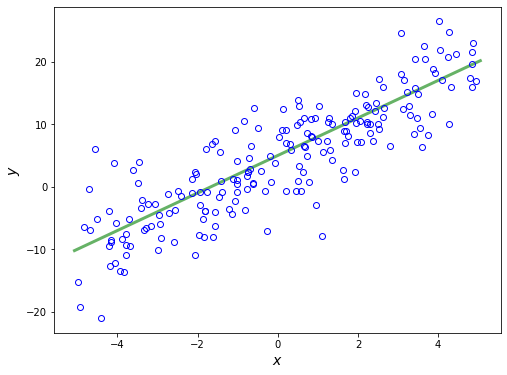

In [3]:
x, y, _, f_truth = lin_data(200)
plt.figure(figsize=(8, 6))
plot_scatter(x, y, f=f_truth)
plt.show()

## 岭回归

In [4]:
import numpy as np

In [5]:
t = 9
loss = lambda W: np.sum((y - X @ W)**2) / len(y)  # 优化函数
reg = lambda W: W.T @ W - t  # 约束函数

In [6]:
X = np.c_[np.ones(len(x)), x]

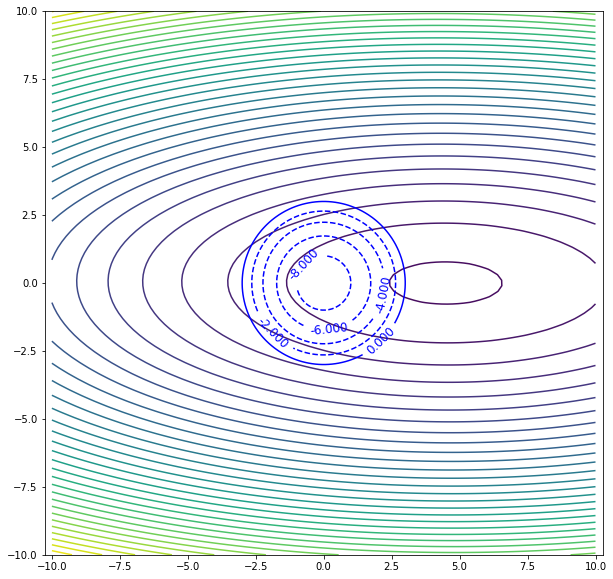

In [7]:
w0n = np.linspace(-10, 10, 100)
w1n = np.linspace(-10, 10, 100)
ww0n, ww1n = np.meshgrid(w0n, w1n)
Wn = np.c_[ww0n.ravel(), ww1n.ravel()]
lossn = np.array([loss(ww.reshape(-1, 1)) for ww in Wn]).reshape(ww0n.shape)

w0n_r = np.linspace(-np.sqrt(t), np.sqrt(t), 50)
w1n_r = np.linspace(-np.sqrt(t), np.sqrt(t), 50)
ww0n_r, ww1n_r = np.meshgrid(w0n_r, w1n_r)
Wn_r = np.c_[ww0n_r.ravel(), ww1n_r.ravel()]
regn = np.array([reg(ww.reshape(-1, 1)) for ww in Wn_r]).reshape(ww0n_r.shape)

fig = plt.figure(figsize=(10, 10))  
ax = fig.add_subplot(111)  
ax.contour(ww0n, ww1n, lossn, levels=30)
cs = ax.contour(ww0n_r, ww1n_r, regn, 
                levels=np.arange(-12, 2, 2), colors='b')
ax.clabel(cs, fontsize=12)
plt.axis('equal')
plt.show()

In [8]:
from scipy import optimize
from scipy.optimize import NonlinearConstraint

In [9]:
nonlinear_contraint = NonlinearConstraint(reg, -np.inf, 0)
results = optimize.minimize(loss, x0=[0.1, 0.1], constraints=[nonlinear_contraint])
results

     fun: 31.877088258038903
     jac: array([-5.37515807, -7.66916776])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([1.7218355, 2.4566812])

In [10]:
W_values = results.x

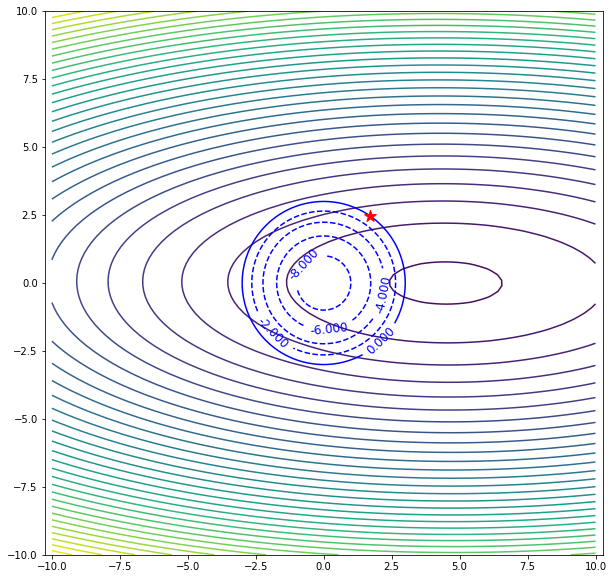

In [11]:
fig = plt.figure(figsize=(10, 10))  
ax = fig.add_subplot(111)  
ax.contour(ww0n, ww1n, lossn, levels=30)
cs = ax.contour(ww0n_r, ww1n_r, regn, 
                levels=np.arange(-12, 2, 2), colors='b')
ax.clabel(cs, fontsize=12)
ax.scatter(W_values[0], W_values[1], marker='*', s=150, c='r', zorder=3)
plt.axis('equal')
plt.show()

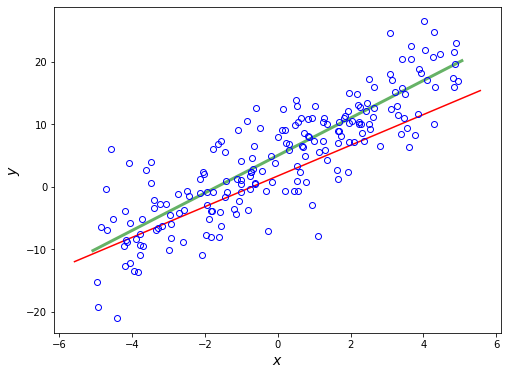

In [12]:
plt.figure(figsize=(8, 6))
plot_scatter(x, y, f=f_truth)
xn = np.linspace(plt.xlim()[0], plt.xlim()[1], 100)
yn = W_values[0] + W_values[1] * xn
plt.plot(xn, yn, c='r')
plt.show()